# Support Vector Machine for Banknote Authentication Dataset

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from matplotlib.colors import ListedColormap

# Load Banknote Authentication Dataset

In [2]:
datasets = pd.read_csv('data_banknote_authentication.txt', header=None)
X = datasets.iloc[:, :-1].values  # Features (all 4 columns)
y = datasets.iloc[:, -1].values   # Target (last column)

# Display dataset info

In [3]:
print("Dataset Shape:", datasets.shape)
print("First 5 rows:\n", datasets.head())

Dataset Shape: (1372, 5)
First 5 rows:
          0       1       2        3  4
0  3.62160  8.6661 -2.8073 -0.44699  0
1  4.54590  8.1674 -2.4586 -1.46210  0
2  3.86600 -2.6383  1.9242  0.10645  0
3  3.45660  9.5228 -4.0112 -3.59440  0
4  0.32924 -4.4552  4.5718 -0.98880  0


# Splitting the dataset into Training and Testing sets

In [4]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

# Feature Scaling

In [5]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

# Hyperparameter Optimization using GridSearchCV

In [6]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly'],  # Removed 'linear' for better non-linearity
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_Train, Y_Train)
best_params = grid_search.best_params_
print("\nBest Hyperparameters:", best_params)


Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


# Train SVM Classifier with Best Parameters

In [7]:
classifier = SVC(**best_params, probability=True)
classifier.fit(X_Train, Y_Train)

SVC(C=1, probability=True)

# Predicting the test set results

In [8]:
Y_Pred = classifier.predict(X_Test)

# Model Evaluation

In [9]:
cm = confusion_matrix(Y_Test, Y_Pred)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(Y_Test, Y_Pred))
accuracy = accuracy_score(Y_Test, Y_Pred)
print("\nModel Accuracy:", accuracy)


Confusion Matrix:
 [[191   0]
 [  0 152]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       152

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343


Model Accuracy: 1.0


# ROC Curve for Model Performance Evaluation

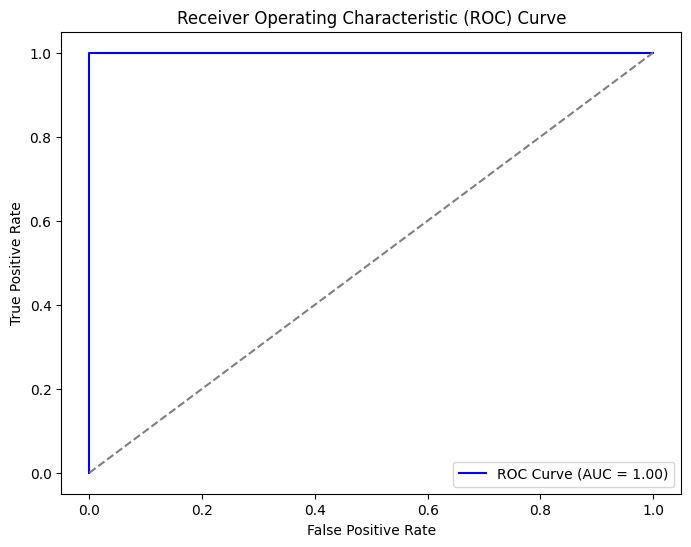

In [10]:
y_proba = classifier.predict_proba(X_Test)[:, 1]
fpr, tpr, _ = roc_curve(Y_Test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Using PCA for Feature Selection in Visualization

In [11]:
pca = PCA(n_components=2)  # Reduce to 2D for visualization
X_Train_2D = pca.fit_transform(X_Train)
X_Test_2D = pca.transform(X_Test)

In [12]:
# Visualising the Training set results

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4508\324175524.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],


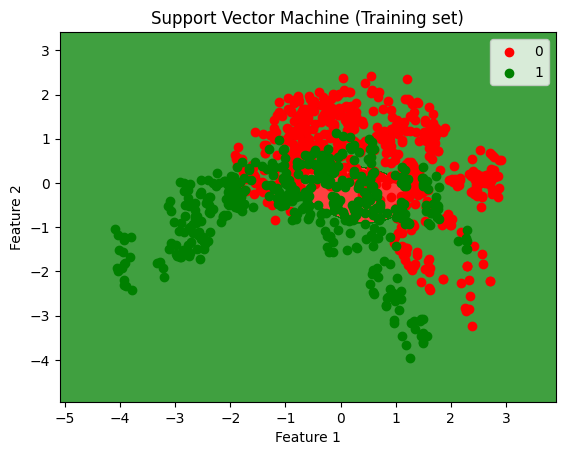

In [13]:
X_Set, Y_Set = X_Train_2D, Y_Train
X1, X2 = np.meshgrid(np.arange(start=X_Set[:, 0].min() - 1, stop=X_Set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_Set[:, 1].min() - 1, stop=X_Set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(sc_X.inverse_transform(np.c_[X1.ravel(), X2.ravel(), 
                                                                   np.zeros((X1.ravel().shape[0], 2))])).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Support Vector Machine (Training set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Visualising the Test set results

In [ ]:
X_Set, Y_Set = X_Test_2D, Y_Test
X1, X2 = np.meshgrid(np.arange(start=X_Set[:, 0].min() - 1, stop=X_Set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_Set[:, 1].min() - 1, stop=X_Set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(sc_X.inverse_transform(np.c_[X1.ravel(), X2.ravel(), 
                                                                   np.zeros((X1.ravel().shape[0], 2))])).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Support Vector Machine (Test set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()